# HW4

### Completed by:  Sheng Xu

Remember, the authoritative HW4 instructions are on the course website: http://www.cs.tufts.edu/comp/135/2019s/hw4.html

Please report any questions to the course Piazza page:

In [1]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from MLPClassifierWithSolverLBFGS import MLPClassifierLBFGS

In [3]:
from viz_tools_for_binary_classifier import plot_pretty_probabilities_for_clf

In [4]:
%matplotlib inline

# Problem 1: XOR

In [5]:
# Load data
x_tr_N2 = np.loadtxt('./data_xor/x_train.csv', skiprows=1, delimiter=',')
x_te_N2 = np.loadtxt('./data_xor/x_test.csv', skiprows=1, delimiter=',')

y_tr_N = np.loadtxt('./data_xor/y_train.csv', skiprows=1, delimiter=',')
y_te_N = np.loadtxt('./data_xor/y_test.csv', skiprows=1, delimiter=',')
print("Number of data points in the training set", y_tr_N.size)
assert x_tr_N2.shape[0] == y_tr_N.shape[0]
assert x_te_N2.shape[0] == y_te_N.shape[0]

Number of data points in the training set 1000


## Problem 1a: MLP size [2] with activation ReLU and L-BFGS solver

In [6]:
# TODO edit this block to run from 16 different random_states
# Save each run's trained classifier object in a list called mlp_relu_lbfgs_list 
mlp_relu_lbfgs_list1a=[]
n_runs = 16
rd_state=range(0,n_runs)
for i in rd_state:
    #print(i)
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    mlp_relu_lbfgs_list1a.append(mlp_lbfgs)

finished LBFGS run  1/16 after    0.1 sec |  24 iters | converged    | loss 0.347
finished LBFGS run  2/16 after    0.0 sec |  29 iters | converged    | loss 0.477
finished LBFGS run  3/16 after    0.0 sec |  21 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.0 sec |  35 iters | converged    | loss 0.347
finished LBFGS run  5/16 after    0.0 sec |  29 iters | converged    | loss 0.347
finished LBFGS run  6/16 after    0.0 sec |  29 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  23 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  37 iters | converged    | loss 0.347
finished LBFGS run  9/16 after    0.0 sec |  15 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.0 sec |  26 iters | converged    | loss 0.000
finished LBFGS run 11/16 after    0.1 sec |  36 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.0 sec |  27 iters | converged    | loss 0.477
finished LBFGS r

### 1a(i): Visualize probabilistic predictions in 2D feature space for ReLU+LBFGS

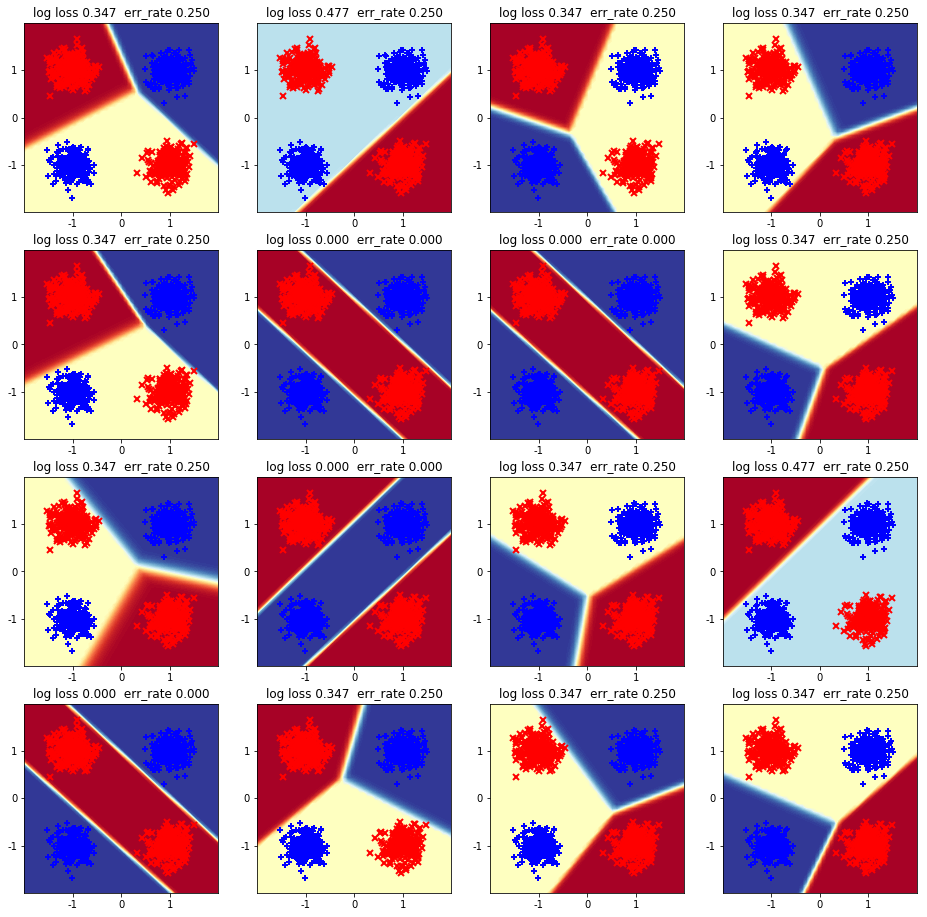

In [7]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for j in range(4):
    for i in range(4):
        plot_pretty_probabilities_for_clf(mlp_relu_lbfgs_list1a[4*j+i], x_tr_N2, y_tr_N, ax=ax_grid[j,i])

### 1a(ii): What fraction of runs reach 0 training error? What happens to the other runs? Describe how rapidly (or slowly) things seem to converge).

**Answer**:   
4 out 16 (25%) reaches 0 error.  
The other runs leaves out 2 or 3 clusters of data points unsorted.  
The algorithm is conerging at about 30 steps.    
The cost of time is very small(<=0.1) in all runs.

## Problem 1b: MLP size [2] with activation Logistic and L-BFGS solver


In [8]:
# TODO edit this block to run from 16 different random_states with LOGISTIC activation
# Save each run's trained classifier object in a list called mlp_logistic_lbfgs_list 
mlp_logi_lbfgs_list1b=[]
n_runs = 16
rd_state=range(0,n_runs)
for i in rd_state:
    #print(i)
    start_time_sec = time.time()
    mlp_lbfgs = MLPClassifierLBFGS(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=200, tol=1e-6,
        random_state=i,
    )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_lbfgs.fit(x_tr_N2, y_tr_N)
    elapsed_time_sec = time.time() - start_time_sec
    print('finished LBFGS run %2d/%d after %6.1f sec | %3d iters | %s | loss %.3f' % (
        i+1, n_runs, elapsed_time_sec,
        len(mlp_lbfgs.loss_curve_),
        'converged   ' if mlp_lbfgs.did_converge else 'NOT converged',
        mlp_lbfgs.loss_))
    mlp_logi_lbfgs_list1b.append(mlp_lbfgs)

finished LBFGS run  1/16 after    0.1 sec |  57 iters | converged    | loss 0.000
finished LBFGS run  2/16 after    0.1 sec | 111 iters | converged    | loss 0.347
finished LBFGS run  3/16 after    0.0 sec |  45 iters | converged    | loss 0.347
finished LBFGS run  4/16 after    0.1 sec |  79 iters | converged    | loss 0.000
finished LBFGS run  5/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  6/16 after    0.0 sec |  42 iters | converged    | loss 0.000
finished LBFGS run  7/16 after    0.0 sec |  50 iters | converged    | loss 0.000
finished LBFGS run  8/16 after    0.0 sec |  40 iters | converged    | loss 0.477
finished LBFGS run  9/16 after    0.1 sec |  62 iters | converged    | loss 0.347
finished LBFGS run 10/16 after    0.1 sec | 128 iters | converged    | loss 0.347
finished LBFGS run 11/16 after    0.1 sec |  95 iters | converged    | loss 0.347
finished LBFGS run 12/16 after    0.1 sec |  97 iters | converged    | loss 0.347
finished LBFGS r

### 1b(i): Visualize probabilistic predictions in 2D feature space for LogisticSigmoid+LBFGS

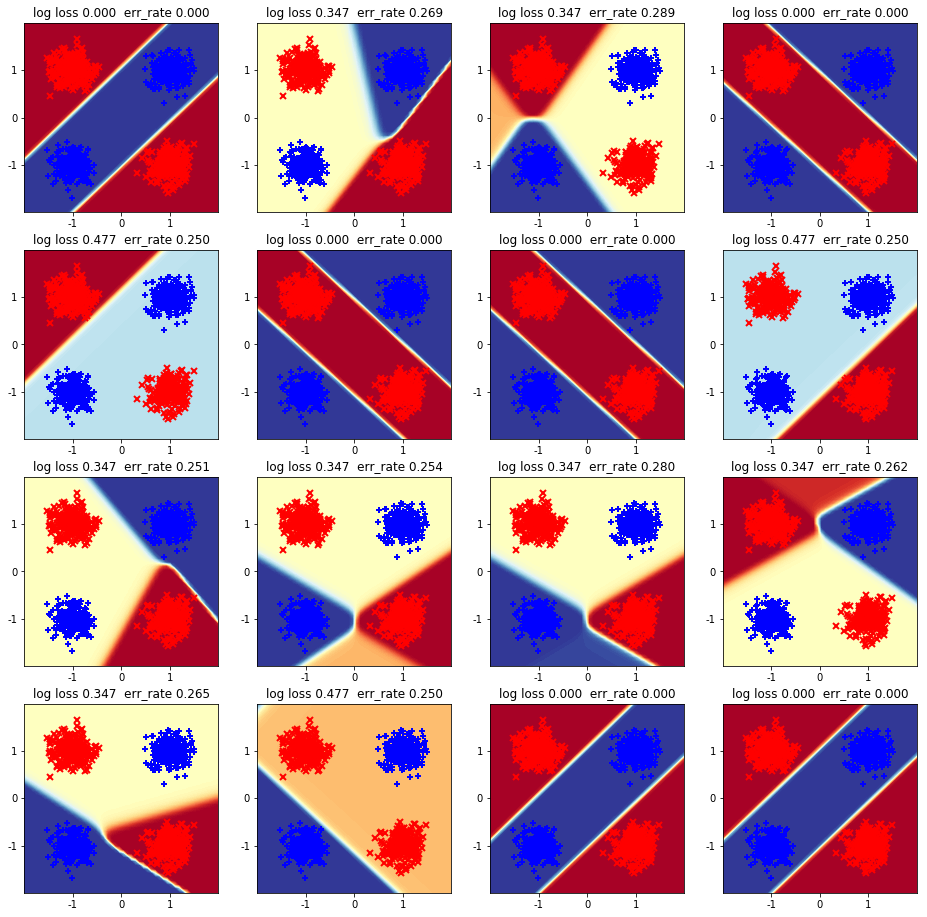

In [9]:
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for j in range(4):
    for i in range(4):
        plot_pretty_probabilities_for_clf(mlp_logi_lbfgs_list1b[4*j+i], x_tr_N2, y_tr_N, ax=ax_grid[j,i])

### 1b(ii): What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1b converge).




**Answer**:  
6 out of 16(37.5%) reaches 0 error.  
This takes a little longer to run. A zero-error run takes about 50 steps. The ones that leave 2 piles unsorted could take more than 100 steps. The ones only sorting one pile out take about 40 steps.  
The cost of time is very small(less than or comparable to 0.1s) in all runs.

## Problem 1c: MLP size [2] with activation ReLU and SGD solver

In [10]:
# TODO edit this block to do 16 different runs (each with different random_state value)
# Save each run's trained classifier object in a list called mlp_relu_sgd_list 
mlp_relu_sgd_list1c=[];
n_runs = 16

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='relu',
        alpha=0.0001,
        max_iter=1000, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
            i+1, n_runs, elapsed_time_sec,
            len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_relu_sgd_list1c.append(mlp_sgd)

finished SGD run  1/16 after    6.7 sec | 267 epochs | converged     | loss 0.347
finished SGD run  2/16 after    7.8 sec | 307 epochs | converged     | loss 0.478
finished SGD run  3/16 after    5.3 sec | 239 epochs | converged     | loss 0.347
finished SGD run  4/16 after   21.8 sec | 1000 epochs | NOT converged | loss 0.001
finished SGD run  5/16 after    5.8 sec | 275 epochs | converged     | loss 0.347
finished SGD run  6/16 after   23.2 sec | 1000 epochs | NOT converged | loss 0.001
finished SGD run  7/16 after   23.3 sec | 1000 epochs | NOT converged | loss 0.001
finished SGD run  8/16 after    6.7 sec | 273 epochs | converged     | loss 0.347
finished SGD run  9/16 after    5.5 sec | 219 epochs | converged     | loss 0.347
finished SGD run 10/16 after   23.5 sec | 1000 epochs | NOT converged | loss 0.001
finished SGD run 11/16 after    8.9 sec | 394 epochs | converged     | loss 0.478
finished SGD run 12/16 after   10.5 sec | 470 epochs | converged     | loss 0.478
finished SGD

### 1c(i): Visualize probabilistic predictions in 2D feature space for ReLU+SGD

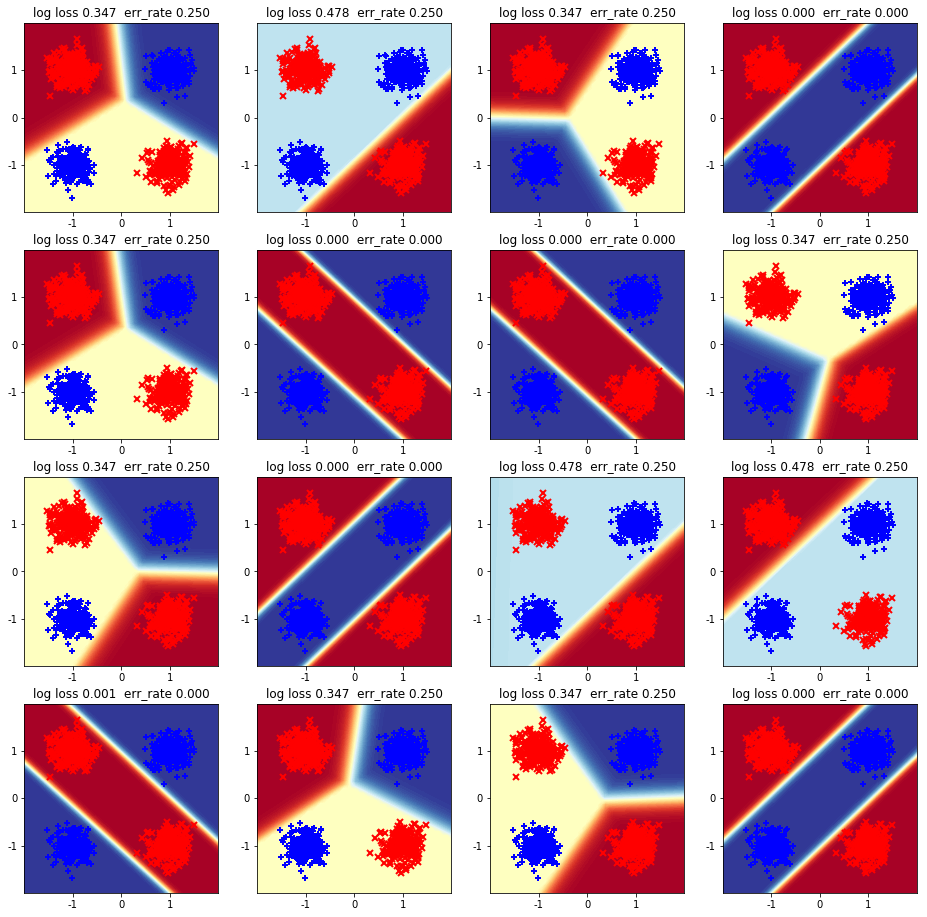

In [11]:
# TODO edit to plot all 16 runs from 1c above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for j in range(4):
    for i in range(4):
        plot_pretty_probabilities_for_clf(mlp_relu_sgd_list1c[4*j+i], x_tr_N2, y_tr_N, ax=ax_grid[j,i])

### **1c(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1c converge).


**Answer**:  
6 out of 16(37.5%) reaches nearly 0 error.   
The nearly zero-error ones do not converge within 1000 steps.  
The others takes about 200 to 400 steps.  
The running time of a converged run is tipically larger than 4 seconds.

### **1c(iii):** What is most noticeably different between SGD with batch size 10 and the previous L-BFGS in 1a (using the same ReLU activation function)?


**Answer**:    
The SGD uses far more time than L-BBFGS.    
And the nearly zero-error runs of SGD are not converging (at least within 1000 iter it's not).

## Problem 1d: MLP size [2] with activation Logistic and SGD solver

In [12]:
# TODO edit to do 16 runs of SGD, like in 1c but with LOGISTIC activation
mlp_logi_sgd_list1d=[];
n_runs = 16

for i in range(n_runs):
    start_time_sec = time.time()
    mlp_sgd = MLPClassifier(
        hidden_layer_sizes=[2],
        activation='logistic',
        alpha=0.0001,
        max_iter=1000, tol=1e-8,
        random_state=i,
        solver='sgd', batch_size=10,
        learning_rate='adaptive', learning_rate_init=0.1, momentum=0.0,
        )
    with warnings.catch_warnings(record=True) as warn_list:
        mlp_sgd.fit(x_tr_N2, y_tr_N)
    mlp_sgd.did_converge = True if len(warn_list) == 0 else False
    elapsed_time_sec = time.time() - start_time_sec
    print('finished SGD run %2d/%d after %6.1f sec | %3d epochs | %s | loss %.3f' % (
            i+1, n_runs, elapsed_time_sec,
            len(mlp_sgd.loss_curve_),
            'converged    ' if mlp_sgd.did_converge else 'NOT converged',
            mlp_sgd.loss_))
    mlp_logi_sgd_list1d.append(mlp_sgd)

finished SGD run  1/16 after    3.8 sec | 161 epochs | converged     | loss 0.693
finished SGD run  2/16 after   23.3 sec | 1000 epochs | NOT converged | loss 0.004
finished SGD run  3/16 after   25.5 sec | 1000 epochs | NOT converged | loss 0.004
finished SGD run  4/16 after    5.4 sec | 215 epochs | converged     | loss 0.693
finished SGD run  5/16 after   26.0 sec | 1000 epochs | NOT converged | loss 0.351
finished SGD run  6/16 after   25.0 sec | 1000 epochs | NOT converged | loss 0.004
finished SGD run  7/16 after   25.9 sec | 1000 epochs | NOT converged | loss 0.004
finished SGD run  8/16 after   10.6 sec | 436 epochs | converged     | loss 0.351
finished SGD run  9/16 after   15.7 sec | 636 epochs | converged     | loss 0.351
finished SGD run 10/16 after   20.5 sec | 803 epochs | converged     | loss 0.351
finished SGD run 11/16 after    3.2 sec | 124 epochs | converged     | loss 0.693
finished SGD run 12/16 after   25.3 sec | 1000 epochs | NOT converged | loss 0.004
finished S

### 1d(i): Visualize probabilistic predictions in 2D feature space for Logistic+SGD

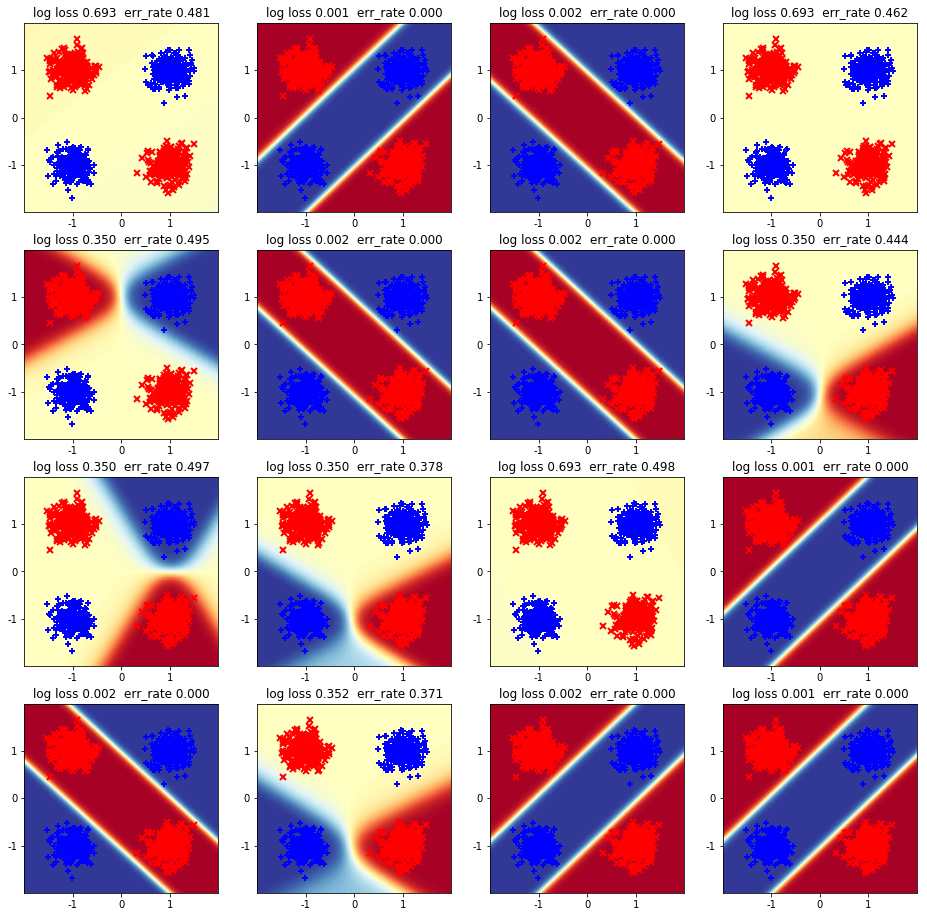

In [13]:
# TODO edit to plot all 16 runs from 1d above
fig, ax_grid = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for j in range(4):
    for i in range(4):
        plot_pretty_probabilities_for_clf(mlp_logi_sgd_list1d[4*j+i], x_tr_N2, y_tr_N, ax=ax_grid[j,i])

### **1d(ii):** What fraction of the 16 runs finds the 0 error rate solution? Describe how rapidly (or slowly) the runs in 1d converge).



**Answer**:    
8 out of 16(50%) reaches nearly 0 error.  
This takes much longer to run. A nearly zero-error run won't converge in 1000 steps. The ones that leave 2 piles unsorted could take more than 400 steps. The ones sorting nothing take more than 100 steps.  
The cost of time is large. The converged ones will take more than 3s.  

### **1d(iii):** What is most noticeably different between this SGD run with batch size 10 and the previous L-BFGS run with logistic activations? What explanation can you provide for why this happens?


**Answer**:   
The SGD uses far more time than L-BBFGS.    
And the nearly zero-error runs of SGD are not converging (at least within 1000 iters it's not). Some other runs are also not converging within 1000 iterations.   
There are 3 reasons I can think of:   
One is the way we are choosing step size: we use bfgs(2nd order) for GD but first order for SGD so GD is converging faster.     
The second one is that SGD uses less data so it need more steps(which is not parallized in sklearn) to gather enough information.  
The third one is that SGD itself is not converging to the local minimum, but a small region close to the min, and then jumps in the area which explains why in some cases it's not converging.

### Problem 1e: Comparing loss_curves

### **1e(i):** Plot loss_curves for each method from 1a-1d in 2 x 2 subplot grid

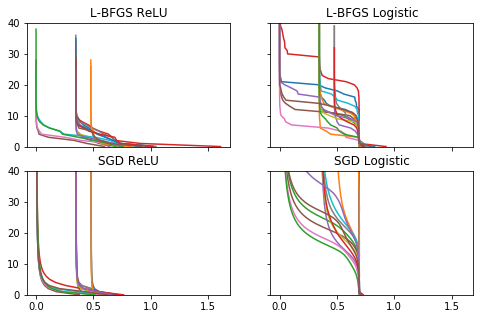

In [58]:
fig, ax_grid = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8,5))

# TODO plot 16 curves for each of the 2x2 settings of solver and activation
for i in range(16):
    aLoss=np.asarray(mlp_relu_lbfgs_list1a[i].loss_curve_); #print(aLoss.shape)
    ax_grid[0,0].plot(aLoss,range(0,aLoss.size))
    bLoss=np.asarray(mlp_logi_lbfgs_list1b[i].loss_curve_); 
    ax_grid[0,1].plot(bLoss,range(0,bLoss.size))
    cLoss=np.asarray(mlp_relu_sgd_list1c[i].loss_curve_); #print(cLoss.shape)
    ax_grid[1,0].plot(cLoss,range(0,cLoss.size))
    dLoss=np.asarray(mlp_logi_sgd_list1d[i].loss_curve_); 
    ax_grid[1,1].plot(dLoss,range(0,dLoss.size))
    
ax_grid[0,0].set_title('L-BFGS ReLU')
ax_grid[0,1].set_title('L-BFGS Logistic')
    
ax_grid[1,0].set_title('SGD ReLU')
ax_grid[1,1].set_title('SGD Logistic')
plt.ylim([0, 40.0]); # keep this y limit so it's easy to compare across plots

### **1e(ii):** From this overview plot (plus your detailed plots from 1a-1d), which activation function seems easier to optimize, the ReLU or the Logistic Sigmoid?

**Answer:** 
ReLU

### **1e(iii):** Are you convinced that one activation function is always easier to optimize? Suggest 3 additional experimental comparisons that would be informative.

**Answer**:   
1 Use them on a larger data set.   
2 Use them on a more complicated data set.   
3 Test them using different optimization methods.

### **1e(iv):** list 2 reasons to prefer L-BFGS over SGD, and 2 reasons to prefer SGD over L-BFGS.

**Answer**:   
Prefer BFGS: Second Order Convergence; Guaranteed convergence to (local) minimum.   
Prefer SGD:  Use less data each time(especially when there are a large number of data points); More features(i.e number of data in a batch; whether to reshuffle...) flexible to adjust.

### **1e(v):** list 2 reasons to prefer ReLU over logistic, and 2 reasons to prefer Logistic Sigmoid over ReLU

**Answer**:   
ReLU: simlper gradient; Computation cost is lower.  
Logistic: Continuously differentiable; Not blowing up (bounded).